In [12]:
library(tidyverse)
library(GGally)
library(reshape2)


## Data Description:
This dataset is obtained from https://www.kaggle.com/datasets/saurabhbadole/restaurant-tips-dataset.  
Collected from a popular restaurant over a specified period, this dataset looks into the tipping behavior in a restaurant setting. In this dataset, there are in total 244 observations, and 7 variables.  
Table of variables used:
| Variable Name | Discription | Type |
| :---: | :---: | :---: |
|total_bill| total bill amount in dollars|Numerical, independent variable|
|sex| Gender of the person paying the bill (Male/Female)|Categorical, independent variable|
|smoker|Whether the person is a smoker (Yes/No) |Categorical, independent variable|
|day|Day of the week when the transaction took place (Thur/Fri/Sat/Sun)|Categorical, independent variable|
|time|Time of day when the transaction took place (Lunch/Dinner)|Categorical, independent variable|
|size|Size of the dining party (number of people)|Numerical, independent variable|
|tip|Tip amount in dollars|Numerical, target variable|

## Question:
The reaserch question would be a predictive one:  
Given that a party of 3 on a Friday dinner time, and the person who pays the bill is a female smoker, what would be the tip amount, given the total bill amount?

## EDA and Visualization

In [ ]:
# 	https://www.kaggle.com/datasets/saurabhbadole/restaurant-tips-dataset 

data_tips <- read.csv("tips.csv")
head(data_tips)
ncol <- ncol(data_tips)
norw <- nrow(data_tips)

,total_bill,tip,sex,smoker,day,time,size
,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<int>
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4
6,25.29,4.71,Male,No,Sun,Dinner,4


In [26]:
corr_matrix_tip <- 
   data_tips %>%
   select(-sex, -smoker,-day,-time, -tip) %>% 
   cor() %>%
   as_tibble(rownames = 'var1') %>%
   pivot_longer(-var1, names_to = "var2", values_to = "corr")

# your code here

corr_matrix_tip


var1,var2,corr
<chr>,<chr>,<dbl>
total_bill,total_bill,1.0000000
total_bill,size,0.5983151
size,total_bill,0.5983151
size,size,1.0000000


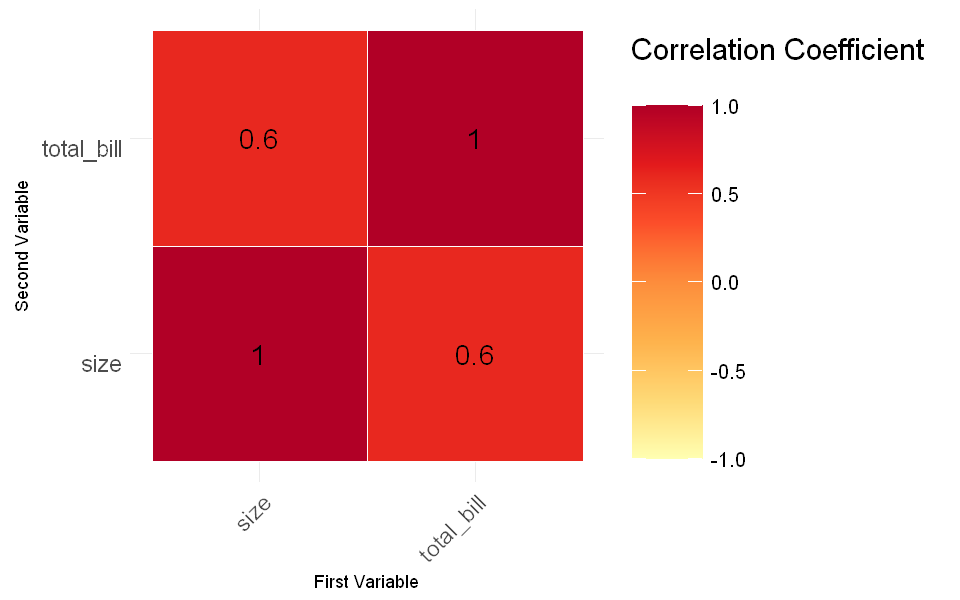

In [27]:
# Adjust these numbers so the plot looks good in your desktop.
options(repr.plot.width = 8, repr.plot.height = 5) 

plot_corr_matrix_tips <- 
  corr_matrix_tip %>%
  ggplot(aes(x=var1, y=var2)) +
  geom_tile(aes(fill = corr), color = "white") +
  scale_fill_distiller("Correlation Coefficient \n",
      palette =  "YlOrRd",
      direction = 1, 
      limits = c(-1,1)
    ) +
    labs(x = "First Variable", y = "Second Variable") +
    theme_minimal() +
    theme(
        axis.text.x = element_text(angle = 45, vjust = 1, size = 14, hjust = 1),
        axis.text.y = element_text(vjust = 1, size = 14, hjust = 1),
        legend.title = element_text(size = 18),
        legend.text = element_text(size = 12),
        legend.key.size = unit(1.5, "cm")
    ) +
    coord_fixed() +
  geom_text(aes(x=var1, y=var2, label = round(corr, digits=2)), color = "black", size = 6)

# your code here
plot_corr_matrix_tips

This correlation matrix is made to make sure that the only two numerical variables are not hightly correlated, so that we can rule out the issue with multicollinearity when formulating the prediction model.

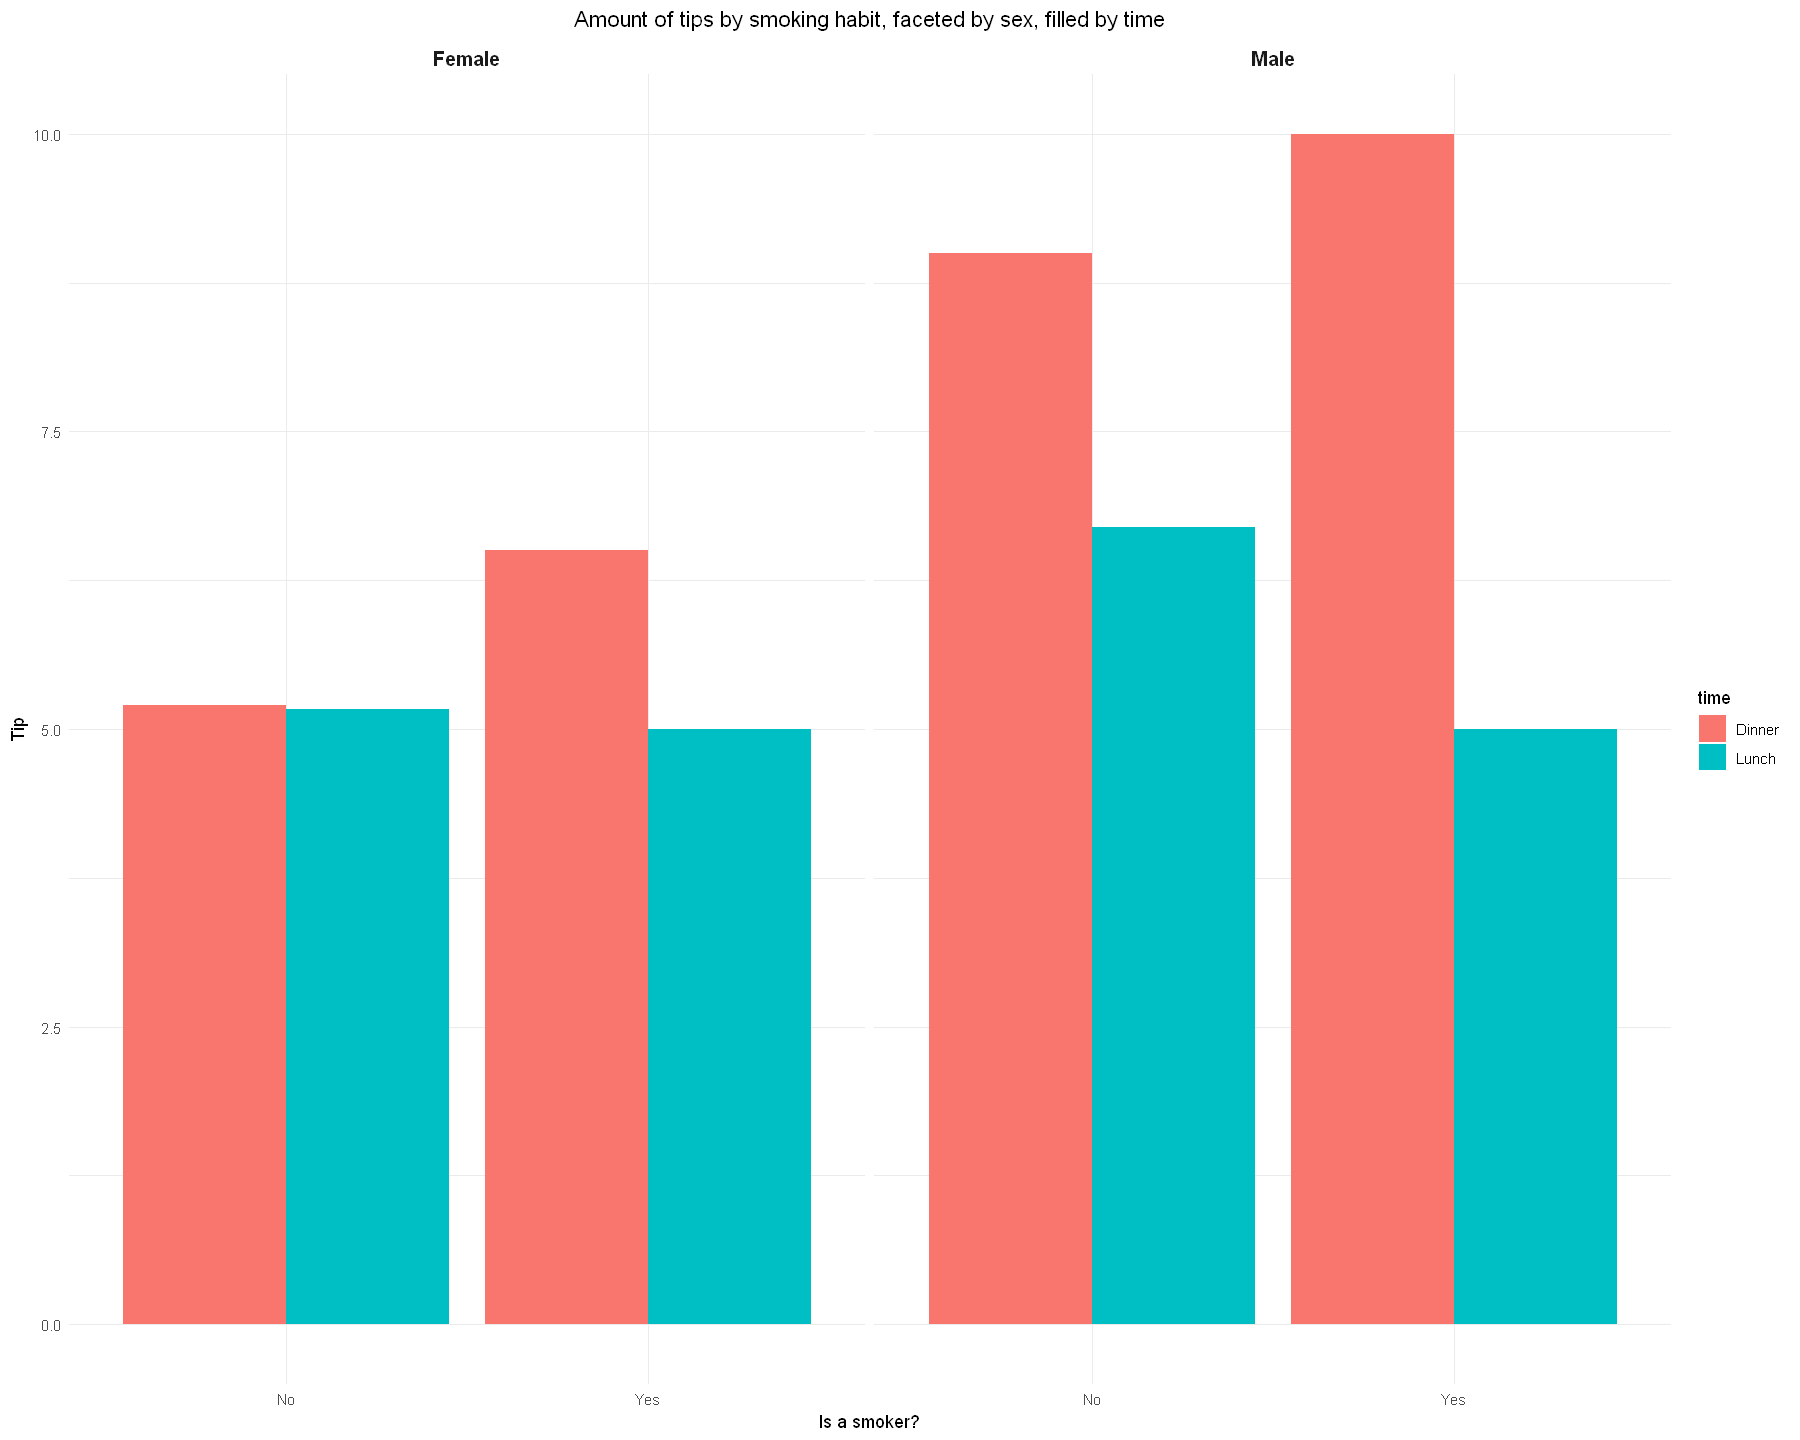

In [ ]:
options(repr.plot.width = 15, repr.plot.height = 12) 

ggplot(data_tips, aes(x = smoker, y = tip)) +
  geom_bar(aes(fill = time), stat = "identity", position = "dodge") +
  facet_wrap(~ sex) + 
  labs(
    title = "Amount of tips by smoking habit, faceted by sex, filled by time",
    x = "Is a smoker?",
    y = "Tip"
  ) +
  theme_minimal() +
  theme(
    strip.text = element_text(size = 12, face = "bold"), 
    plot.title = element_text(hjust = 0.5)
    )


This bar plot is made to explore the potential correlation between smoking habit and amount of tips given, given the customers' gender or time when the bill was payed.